#드롭 아웃 (Drop out)
드롭 아웃 (Drop Out)은 모델이 과적합되는 것을 막기 위한 가장 보편적인 Regularization 기법 중 하나입니다.
드롭 아웃은 데이터를 학습할 때, 일부 뉴런을 랜덤하게 0으로 만들어 모델 내부의 특정 Weight에 치중되는 것을 막습니다.<br>
이를 통해 모델이 특정 데이터에 치중되는 것을 막고 일반화된 모델을 만들 수 있습니다.<br>
드롭 아웃을 사용하는데 있어 주의할 점은 학습이 끝난 후 테스트 과정에서는 드롭 아웃을 사용하면 안된다는 점입니다.<br>이번 실습에서 드롭 아웃을 적용한 모델과 적용하지 않은 모델의 Loss 차이를 보겠습니다.

관련 링크 https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit
# 실습
## Drop-out Layer
- keras.layers.Dropout(prob)
    - prob : 드롭 아웃을 적용할 확률 (0.1 ~ 0.5)
1. 작성된 코드를 보며 이해해보세요.
2. `dropout_model`에 `Dropout Layer`를 추가해보세요.
3. `basic_model`과`dropout_model`의 Loss 그래프를 확인해보세요.

W0724 13:20:00.758386 20368 deprecation.py:323] From C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 20000 samples
Epoch 1/20
20000/20000 - 1s - loss: 0.6971 - accuracy: 0.5489 - binary_crossentropy: 0.6971 - val_loss: 0.6602 - val_accuracy: 0.6113 - val_binary_crossentropy: 0.6602
Epoch 2/20
20000/20000 - 0s - loss: 0.6256 - accuracy: 0.6559 - binary_crossentropy: 0.6256 - val_loss: 0.6020 - val_accuracy: 0.6720 - val_binary_crossentropy: 0

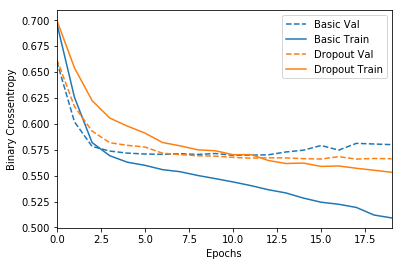

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 각각 리뷰에 따른 데이터 길이가 다르기 때문에 데이터의 Shape을 맞춰줘야합니다.
def sequences_shaping(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 각 리뷰 별 빈도수가 높은 단어를 dimension 개수 만큼만 추출하여 사용합니다.
        
    return results

# 시각화 함수
def Visulaize(histories, key='binary_crossentropy'):
    #plt.figure(figsize=(,20))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    
    plt.show()

# 100번째 까지 많이 사용하는 단어까지 추출
word_num = 100
data_num = 20000

# Keras에 내장되어 있는 imdb 데이터 세트를 불러옵니다.
# IMDb 데이터 세트는 Train 25000개 test 25000개로 이루어져 있습니다.
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=word_num)

# 데이터 Shape을 맞춰주기 위한 sequence 함수를 불러옵니다.
train_data = sequences_shaping(train_data, dimension=word_num)
test_data = sequences_shaping(test_data, dimension=word_num)

# 메모리 효율을 위해 데이터 중 data_num개만 사용합니다.
train_data = train_data[:data_num,:]
test_data = test_data[:data_num,:]
train_labels = train_labels[:data_num]
test_labels =test_labels[:data_num]

# 드롭 아웃을 적용한 모델과 비교하기 위해 기본 모델을 하나 만들어줍니다.

basic_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(word_num,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 각 Layer에 Dropout이 적용된 모델을 만들어보세요.
dropout_model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(word_num,)),
    # Dense (Fully Connected) Layer에 드롭 아웃을 적용해보세요.
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(64, activation=tf.nn.relu),
    # Dense (Fully Connected) Layer에 드롭 아웃을 적용해보세요.
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
basic_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
basic_model.summary()
# 모델을 학습시킵니다.
basic_history = basic_model.fit(train_data,train_labels,epochs=20,batch_size=500,validation_data=(test_data, test_labels), verbose=2)

# 기존 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
dropout_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'binary_crossentropy'])
# 현재 모델이 어떻게 이루어져있는지 출력합니다.
dropout_model.summary()
# Drop out이 적용된 모델을 학습시킵니다.
dropout_history = dropout_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels),verbose=2)


# 각 모델 별 Loss 그래프를 그려줍니다.
Visulaize([('Basic', basic_history),('Dropout', dropout_history)])
              
